In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
print(pd.__version__)
import progressbar

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas    : 1.2.0
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.0
matplotlib: 3.3.3
h5py      : 2.10.0

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-40-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Wed Jan 27 2021 12:31:44CET



## Load of the test data

In [3]:
regen_data = False

In [4]:
if regen_data:
    from process import load_generate_data
    from process import savedata
    regr_data, class_data = load_generate_data(0.1, 50)
    savedata(regr_data, "../data/regression/100.csv")
    savedata(class_data, "../data/classifier/250.csv")

In [5]:
if not regen_data:
    from process import loaddata
    regr_data = loaddata("../data/regression/100.csv")
    class_data = loaddata("../data/classifier/250.csv")

In [6]:
np.random.shuffle(class_data)
yc_test = class_data[:,0]
xc_test = class_data[:,1:]

In [7]:
np.random.shuffle(regr_data)
yr_test = regr_data[:,-3:]
xr_test = regr_data[:,:6]

In [8]:
xc_test.shape

(334438, 10)

In [9]:
xr_test.shape

(62032, 6)

## Model Build

In [10]:
from tensorflow import keras 

In [11]:
model_regr = keras.models.load_model('../models/regression/large_mse.h5')
model_class = keras.models.load_model('../models/classifier/with-dropout-250.h5')

## Test of the Classification NN

In [12]:
model_class.fit(xc_test, yc_test)

10452/10452 [==============================] - 39s 4ms/step - loss: 0.1784 - accuracy: 0.9399


## Test of the Regression NN

In [13]:
model_regr.fit(xr_test, yr_test)

1939/1939 [==============================] - 10s 5ms/step - loss: 7.6243e-06 - mae: 0.0022


## Test spectrum

In [14]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step')
    plt.yscale("log")
    plt.show()

In [15]:
final_p = []
final_e = []

for regr_pair in regr_data:
    final_e.append(np.linalg.norm(regr_pair[10:13]))
    final_p.append(np.linalg.norm(regr_pair[13:16]))

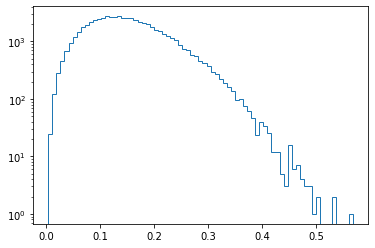

In [16]:
energy_spectrum(final_e, 75)

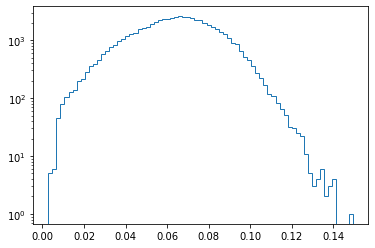

In [17]:
energy_spectrum(final_p, 75)

In [18]:
photon_final_nn = []
threshold = 0.5
for i, x in enumerate(xc_test[:200]):
    if i%100 == 0:
        print("{}%".format(i/len(xc_test) * 100))
    x = np.array([x])
    classification = model_class.predict(np.stack(x))
    if classification >= threshold:
        regr_x = np.array([x[0,:6]])
        regr_result = model_regr.predict(regr_x)
        photon_final_nn.append(np.linalg.norm(regr_result[0]))

0.0%
0.029900908389596876%


In [25]:
from tensorflow import keras 
photon_final_nn = []
threshold = 0.5
num = int(0.05*len(xc_test))
bar = progressbar.ProgressBar(maxval=num, 
                              widgets=[progressbar.Bar('=', '[', ']'), ' ', 
                                       progressbar.Percentage(), 
                                       " of {0}".format(num)])
bar.start()
for i, x_ in enumerate(xc_test[:num]):
    x_ = np.array([x_])
    classification = model_class.predict(np.stack(x_))
    if classification >= threshold:
        regr_x = np.array([x_[0,:6]])
        regr_result = model_regr.predict(regr_x)
        photon_final_nn.append(np.linalg.norm(regr_result[0]))
    bar.update(i+1)
bar.finish()

[===============================================================] 100% of 16721


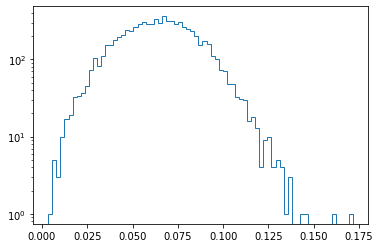

In [26]:
energy_spectrum(photon_final_nn, 75)

In [27]:
photon_final_nn

[0.10493891,
 0.07559793,
 0.085535854,
 0.059127543,
 0.10019427,
 0.09413987,
 0.060497295,
 0.05942565,
 0.058846675,
 0.047061585,
 0.06646373,
 0.046291888,
 0.06258085,
 0.06374908,
 0.083462924,
 0.06296143,
 0.051597614,
 0.044654205,
 0.070212126,
 0.068777576,
 0.06654069,
 0.054593313,
 0.0936376,
 0.027809039,
 0.027851585,
 0.04963026,
 0.08538946,
 0.05034745,
 0.059665095,
 0.057980012,
 0.08336368,
 0.03373471,
 0.09633128,
 0.08888154,
 0.0746386,
 0.055302497,
 0.061333083,
 0.053019013,
 0.09216144,
 0.06278525,
 0.056015328,
 0.07266074,
 0.06525024,
 0.059887953,
 0.06814389,
 0.076256916,
 0.067001425,
 0.07569669,
 0.07550679,
 0.05959935,
 0.09249195,
 0.03582119,
 0.040933315,
 0.06534244,
 0.10802235,
 0.07459237,
 0.033990398,
 0.1029848,
 0.022651264,
 0.036612045,
 0.090585954,
 0.083540775,
 0.09671602,
 0.039831348,
 0.07419946,
 0.046597783,
 0.06927071,
 0.057549078,
 0.07471661,
 0.045043264,
 0.06575698,
 0.12876877,
 0.05919832,
 0.0909458,
 0.063644

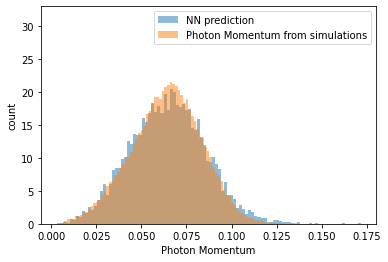

In [30]:
plt.hist(photon_final_nn, 100, alpha=0.5, label='NN prediction', density = True)
plt.hist(final_p, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
plt.xlabel('Photon Momentum')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.ylim((0, 33))
plt.show()

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


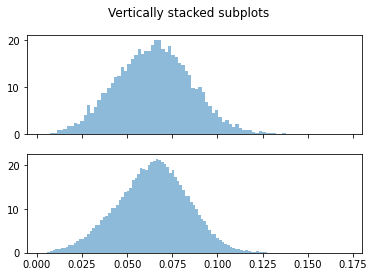

In [29]:
fig, axs = plt.subplots(2, sharex = True)
fig.suptitle('Vertically stacked subplots')
axs[0].hist(photon_final_nn, 90, alpha=0.5, label='NN prediction', density = True)
axs[1].hist(final_p, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
fig.show()